# **House market Study Notebook**

## Objectives
- Get to know the dataset in detail
- Answer business requirement 1
- Prepare approach for setting up a data pipeline

## Inputs
- outputs/data_collection/house_price_data.csv
- outputs/data_cleaned/house_price_data.csv

## Outputs
- Insights and visualisations for Dashboard 'House Market Study'

## Conclusion
- The parameters which have the highest correlation with Sales Price are : 'OverallQual' and 'GrLivArea'
- tbd


---

## Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/ci-c5-housing-market-prices/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/ci-c5-housing-market-prices'

---

## Get data

Load collected and analysed data from outputs/collection.

In [5]:
import pandas as pd
df_raw_path = "outputs/data_cleaned/house_market_data_complete_cleaned.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,0,548,2,2003.0,1710,3,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,1,460,2,1976.0,1262,2,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,608,2,2001.0,1786,3,162.0,42,5,7,920,2001,2002,223500


---

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Get to know the data based on Sales Price

Provide average, median, highest and lowest values to get a better understanding of the dataset

In [5]:
# Calculate the average (mean) of the 'sales price' column
average_sales_price = df['SalePrice'].mean()
print(f"Average Sales Price: {average_sales_price}")

# Calculate the median of the 'sales price' column
median_sales_price = df['SalePrice'].median()
print(f"Median Sales Price: {median_sales_price}")

# Calculate the highest and lowest value of the 'sales price' column
highest_sales_price = df['SalePrice'].max()
lowest_sales_price = df['SalePrice'].min()
print(f"Highest Sales Price: {highest_sales_price}")
print(f"Lowest Sales Price: {lowest_sales_price}")

# Calculate the Interquartile Range (IQR) to identify outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside of 1.5 * IQR above Q3 or below Q1
outliers = df[(df['SalePrice'] < (Q1 - 1.5 * IQR)) | (df['SalePrice'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in Sales Price:\n{outliers}")

# Display the summary statistics for 'sales price'
summary_stats = df['SalePrice'].describe()
print(f"Summary Statistics:\n{summary_stats}")

Average Sales Price: 180921.19589041095
Median Sales Price: 163000.0
Highest Sales Price: 755000
Lowest Sales Price: 34900
Outliers in Sales Price:
      1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  GarageArea  \
11        1182    1142.0           4.0             0         736   
53        1842       0.0           0.0             1         894   
58        1426    1519.0           3.0             1         641   
112       1282    1414.0           4.0             3         792   
151       1710       0.0           2.0             1         866   
...        ...       ...           ...           ...         ...   
1268      1968    1479.0           4.0             2        1014   
1353      2053    1185.0           4.0             3         666   
1373      2633       0.0           2.0             1         804   
1388      1746       0.0           3.0             1         758   
1437      1932       0.0           2.0             3         774   

      GarageFinish  GarageYrBlt  Gr

Graphic about average, median, highest and lowest values

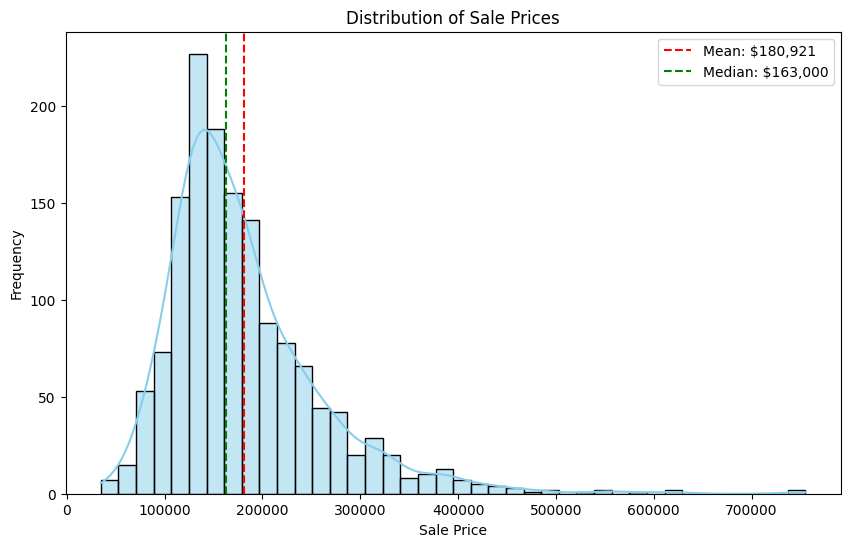

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=40, color='skyblue')
plt.axvline(average_sales_price, color='red', linestyle='--', label=f'Mean: ${average_sales_price:,.0f}')
plt.axvline(median_sales_price, color='green', linestyle='--', label=f'Median: ${median_sales_price:,.0f}')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

---

## Correlation Analysis

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

              1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  \
1stFlrSF      1.000000 -0.184843      0.124773      0.173525    0.445863   
2ndFlrSF     -0.184843  1.000000      0.480787     -0.089812   -0.130006   
BedroomAbvGr  0.124773  0.480787      1.000000     -0.087220   -0.101497   
BsmtExposure  0.173525 -0.089812     -0.087220      1.000000    0.177752   
BsmtFinSF1    0.445863 -0.130006     -0.101497      0.177752    1.000000   
BsmtFinType1  0.217370 -0.141681     -0.142332      0.226048    0.684694   
BsmtUnfSF     0.317987  0.007539      0.154381     -0.031864   -0.495251   
GarageArea    0.489782  0.131849      0.056957      0.197510    0.296970   
GarageFinish  0.267402  0.149024     -0.002778      0.142585    0.195727   
GarageYrBlt   0.233449  0.058254     -0.054573      0.222640    0.153484   
GrLivArea     0.566024  0.668139      0.515925      0.037536    0.208171   
KitchenQual   0.387027  0.158481     -0.013345      0.200791    0.228415   
LotArea     

Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.475241
GarageFinish    0.465039
BsmtFinSF1      0.386420
LotFrontage     0.351799
OpenPorchSF     0.315856
2ndFlrSF        0.312479
BsmtFinType1    0.275054
LotArea         0.263843
BsmtExposure    0.218409
BsmtUnfSF       0.214479
BedroomAbvGr    0.161901
OverallCond    -0.077856
Name: SalePrice, dtype: float64


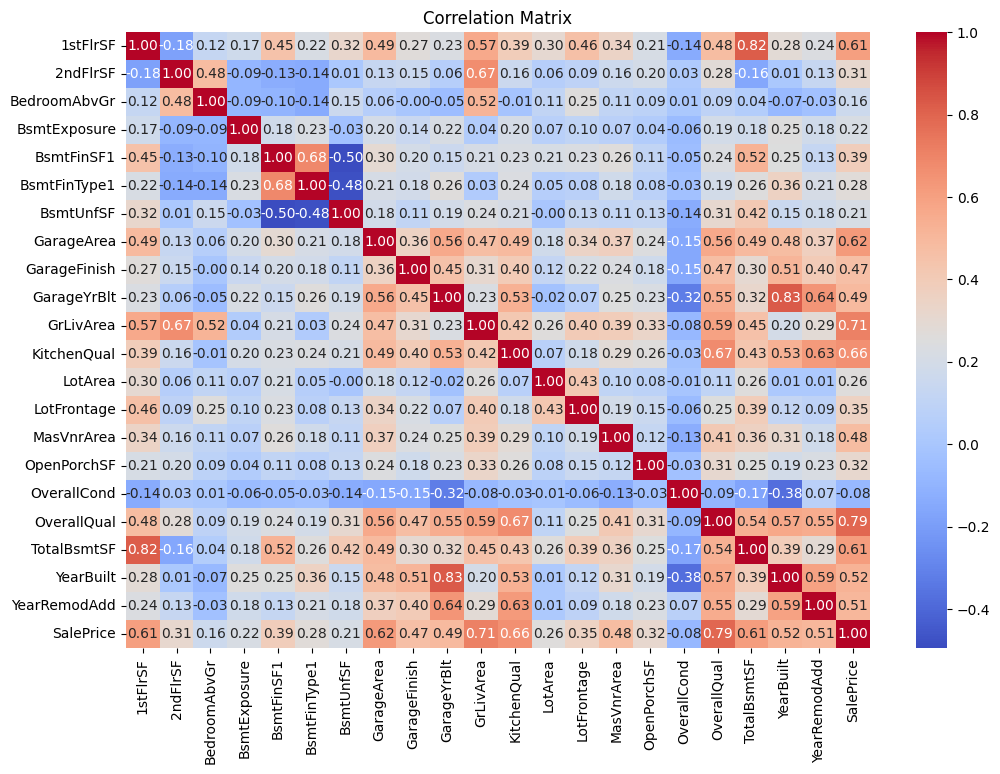

In [23]:
correlation_matrix = df.corr()

# Focus on the correlation with 'SalePrice'
print("Correlation with SalePrice:")
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

# Optionally, you can plot the correlation matrix using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

### Results of the correlation analysis

The following parameters have the biggest impact on the sales price:

#### High Correlation: Correlation coefficient ∣r∣>0.7∣r∣>0.7

- OverallQual      0.790982
- GrLivArea        0.708624


#### Medium Correlation: Correlation coefficient ∣r∣∈[0.3,0.7]∣r∣∈[0.3,0.7]

- KitchenQual      0.659600
- GarageArea       0.623431
- TotalBsmtSF      0.613581
- 1stFlrSF         0.605852
- YearBuilt        0.522897
- GarageFinish     0.510537
- YearRemodAdd     0.507101
- GarageYrBlt      0.486362
- MasVnrArea       0.477493
- BsmtFinSF1       0.386420
- LotFrontage      0.351799
- 2ndFlrSF         0.322335
- OpenPorchSF      0.315856


#### Low Correlation: Correlation coefficient ∣r∣<0.3∣r∣<0.3

- BsmtFinType1     0.275054
- LotArea          0.263843
- BsmtUnfSF        0.214479
- BedroomAbvGr     0.161901
- BsmtExposure     0.106263
- OverallCond     -0.077856

The following varibales will be dropped because the corrlation values are low and irrelevant for the further process.

---

## Boxplot of selected variables

### Boxplot: 'SalePrice' & 'GrLivArea' 

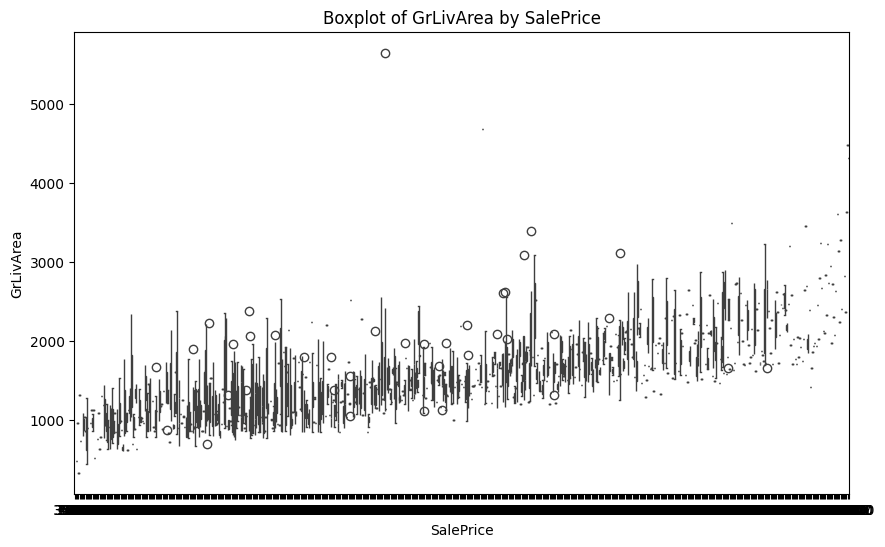

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', y='GrLivArea', data=df)
plt.title('Boxplot of GrLivArea by SalePrice')
plt.show()

### Boxplot: 'SalePrice' & 'OverallQual'

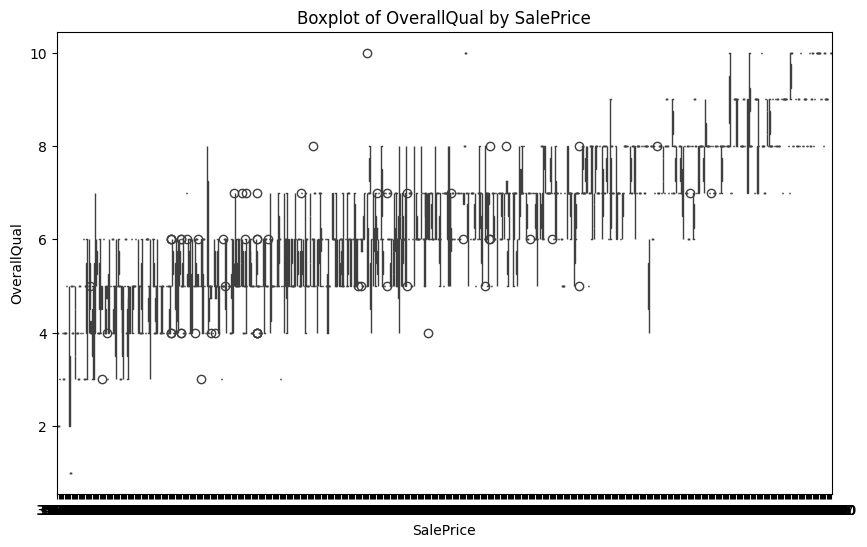

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', y='OverallQual', data=df)
plt.title('Boxplot of OverallQual by SalePrice')
plt.show()

Overall Pairplot

In [33]:
# sns.pairplot(df, hue='SalePrice')  # Replace 'target' with target column
# plt.show()

---

## Distribution of selected variables

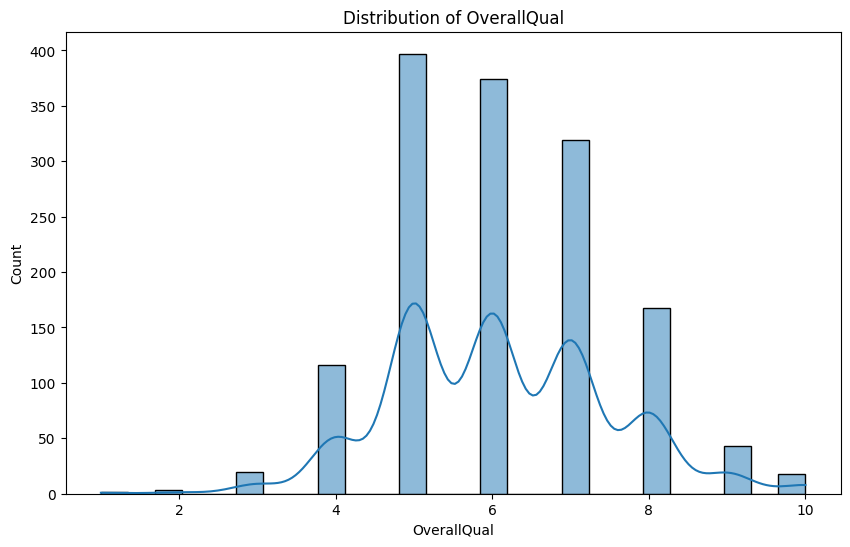

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OverallQual'], kde=True)
plt.title('Distribution of OverallQual')
plt.show()

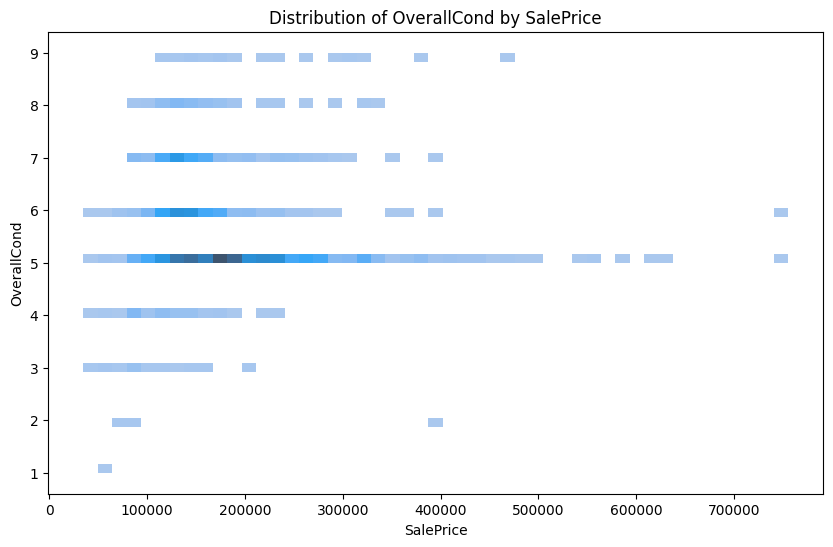

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='OverallCond', data=df, kde=True)
plt.title('Distribution of OverallCond by SalePrice')
plt.show()

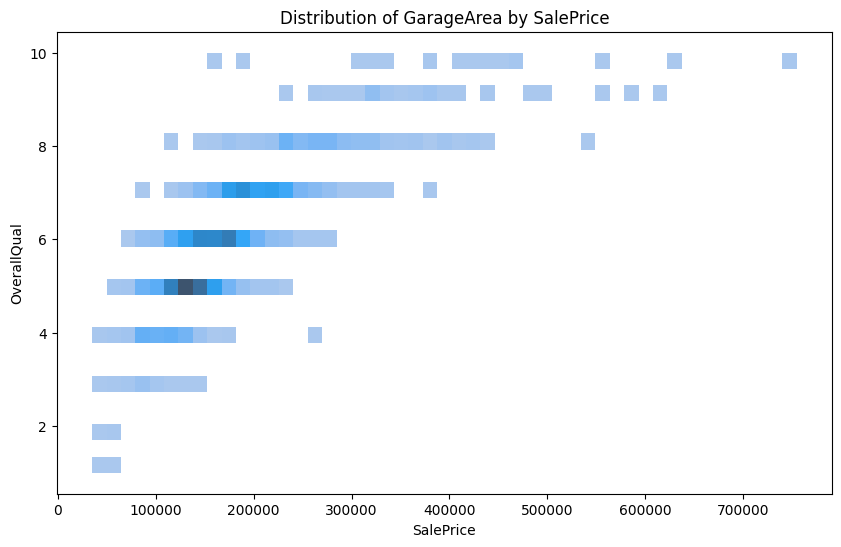

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='OverallQual', data=df, kde=True)
plt.title('Distribution of OverallQual by SalePrice')
plt.show()

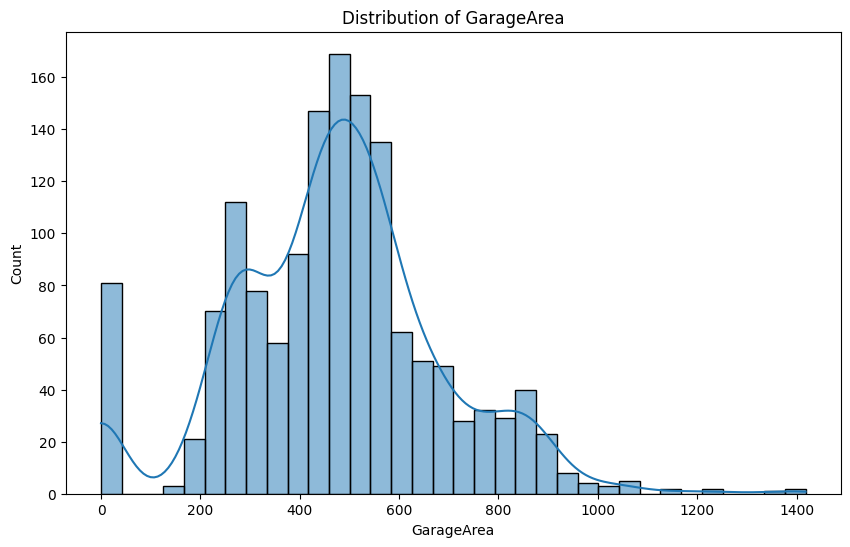

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea'], kde=True)
plt.title('Distribution of GarageArea')
plt.show()

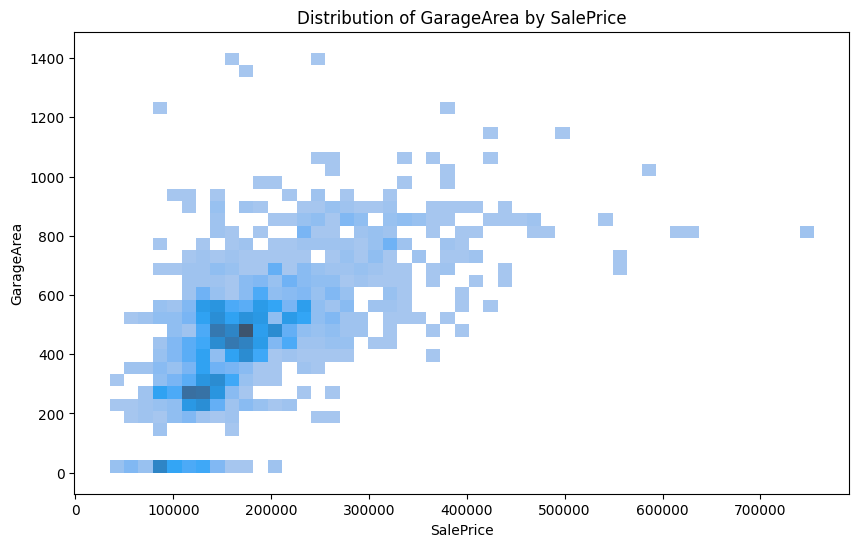

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='GarageArea', data=df, kde=True)
plt.title('Distribution of GarageArea by SalePrice')
plt.show()

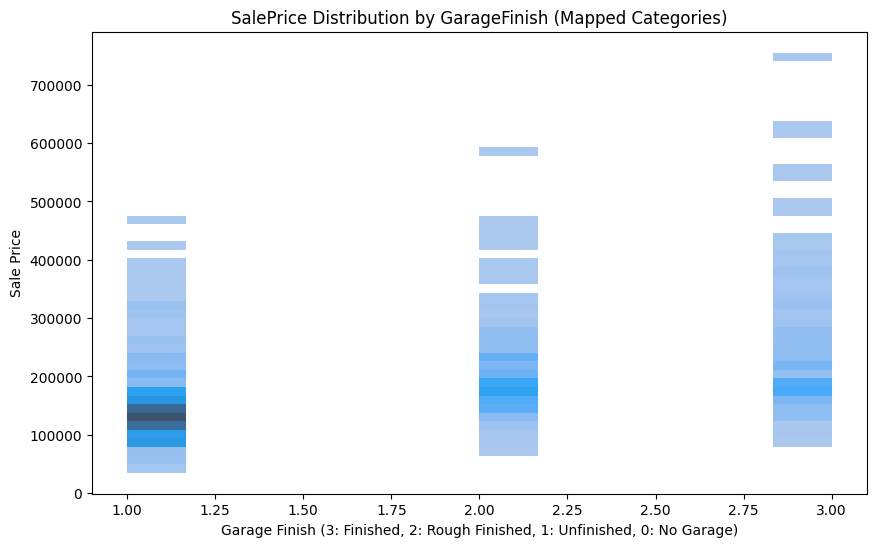

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='GarageFinish', y='SalePrice', data=df)
plt.title('SalePrice Distribution by GarageFinish (Mapped Categories)')
plt.xlabel('Garage Finish (3: Finished, 2: Rough Finished, 1: Unfinished, 0: No Garage)')
plt.ylabel('Sale Price')
plt.show()

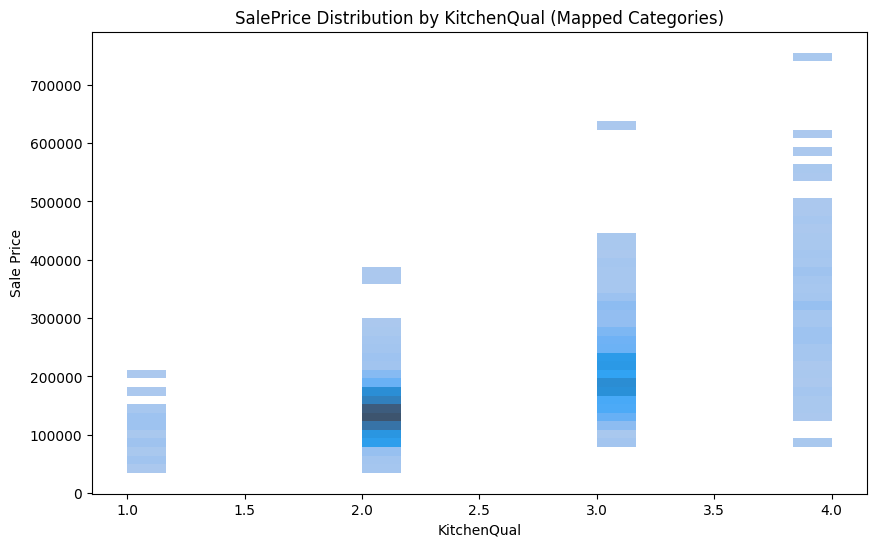

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x='KitchenQual', y='SalePrice', data=df)
plt.title('SalePrice Distribution by KitchenQual (Mapped Categories)')
plt.xlabel('KitchenQual')
plt.ylabel('Sale Price')
plt.show()

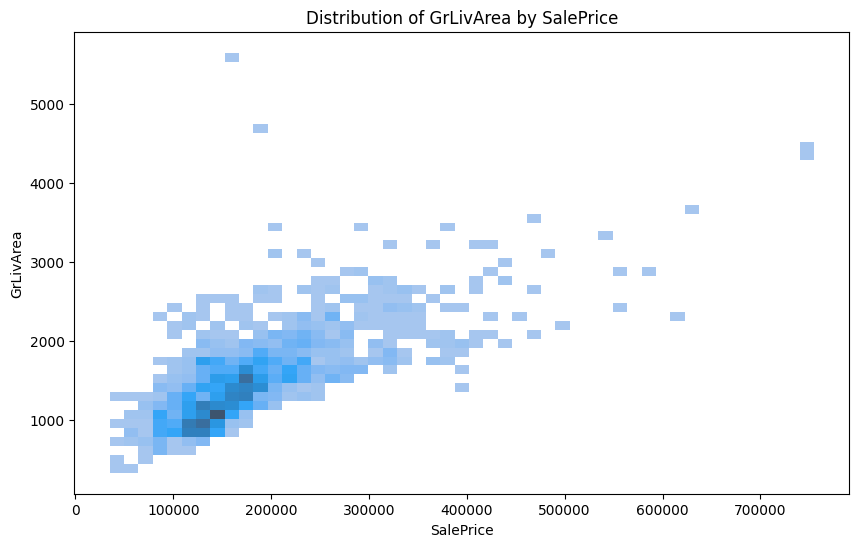

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='GrLivArea', data=df, kde=True)
plt.title('Distribution of GrLivArea by SalePrice')
plt.show()

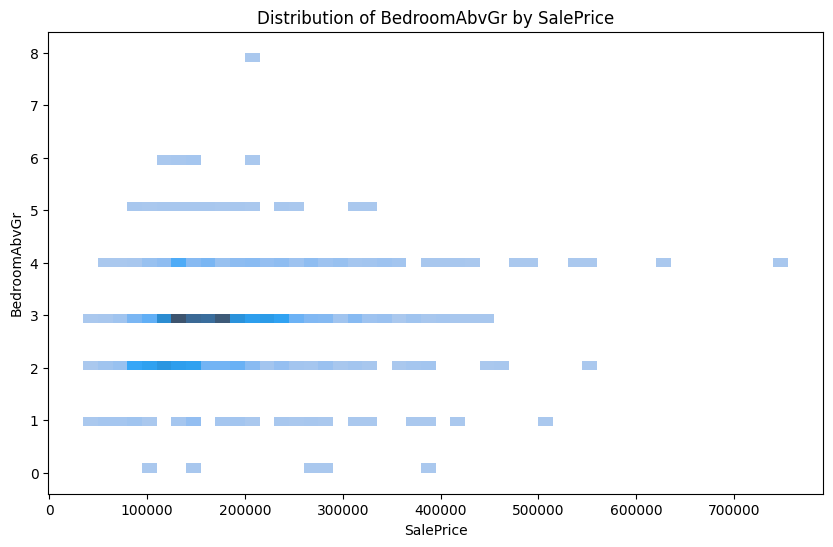

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='BedroomAbvGr', data=df, kde=True)
plt.title('Distribution of BedroomAbvGr by SalePrice')
plt.show()

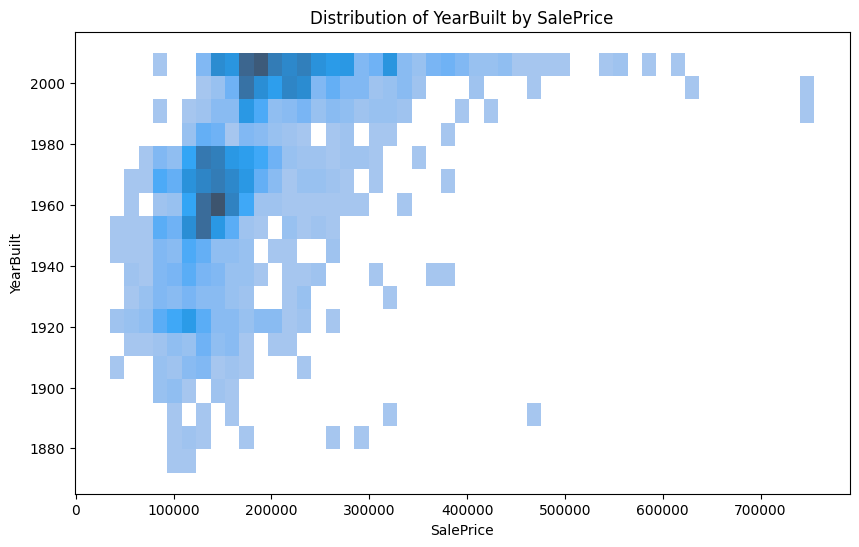

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='YearBuilt', data=df, kde=True)
plt.title('Distribution of YearBuilt by SalePrice')
plt.show()

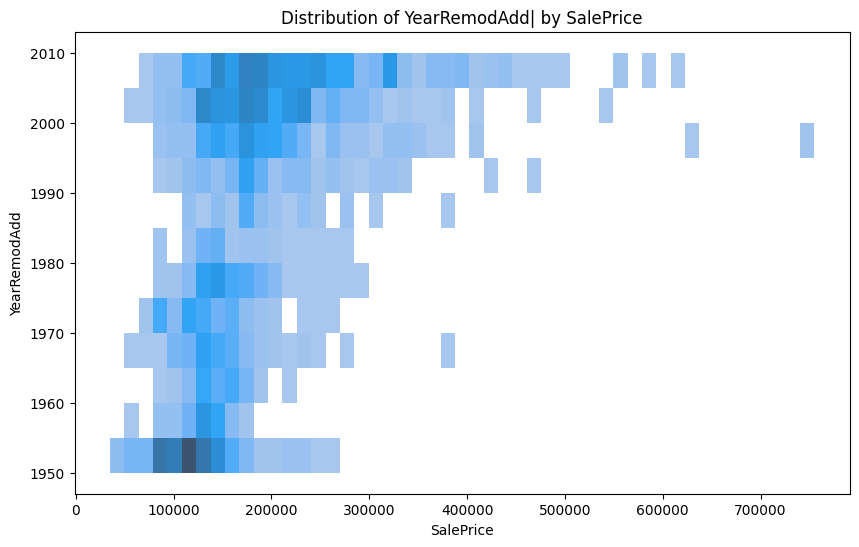

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='YearRemodAdd', data=df, kde=True)
plt.title('Distribution of YearRemodAdd by SalePrice')
plt.show()

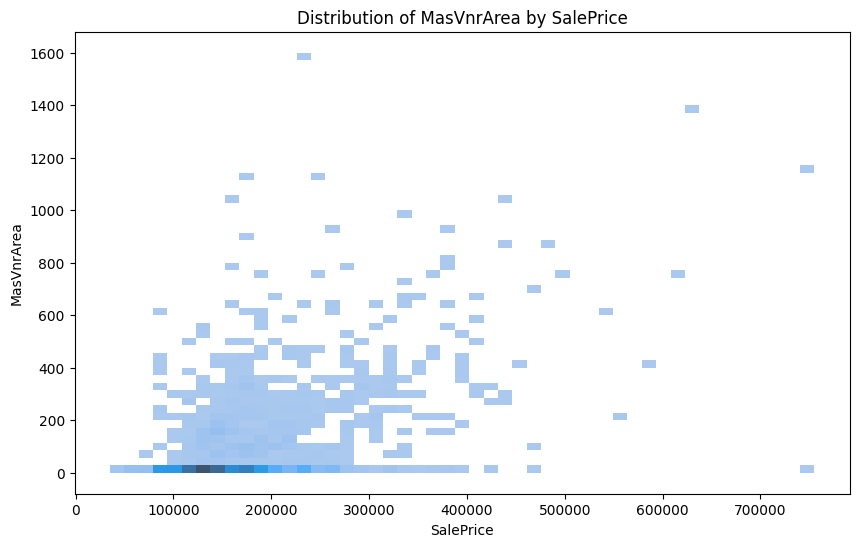

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='MasVnrArea', data=df, kde=True)
plt.title('Distribution of MasVnrArea by SalePrice')
plt.show()

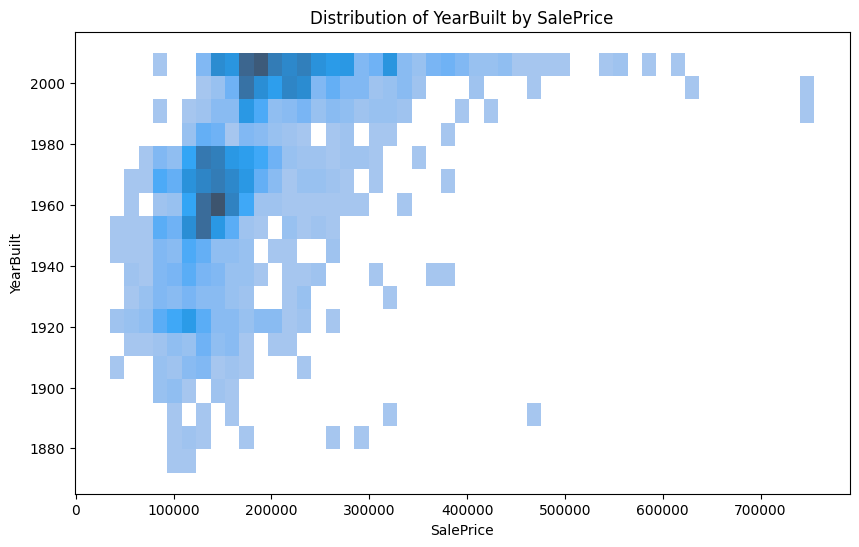

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(x='SalePrice', y='YearBuilt', data=df, kde=True)
plt.title('Distribution of YearBuilt by SalePrice')
plt.show()

---

Analysing houses with missing attributes

In [ ]:
# Count zero values per column
zero_count_per_column = (df == 0).sum()

# Filter columns that have at least one zero value
columns_with_zeros = zero_count_per_column[zero_count_per_column > 0].sort_values(ascending=False)

print("\nColumns with Zero Values and Their Counts:")
print(columns_with_zeros)

---

## House Market Study summary

... 